In [2]:
# !pip install pystan
# !pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/66/ce/cacc6174b65d9e059725ccf8bb6b9653fb7174048a759de7fe639d9a7171/pystan-2.19.1.1-cp37-cp37m-macosx_10_6_intel.whl
  Using cached https://files.pythonhosted.org/packages/f7/86/4509e952f9724f084625e93e0bf8d8519b25c79029a0a916b0f996644c75/fbprophet-0.6.tar.gz
  Using cached https://files.pythonhosted.org/packages/e3/a7/6d045520e6ad11cf630b483f02a0645e743fcc7f75c28fd344c769100203/cmdstanpy-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/e0/a52ffc02395474858552ca6437226e23ad67e25fd85cb387f02e479cfe01/LunarCalendar-0.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c8/7a/8001b0fa34ed038d543500c5fa42c6f95103c338dd2cf12a3469c37e6b65/convertdate-2.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0a/95/73efcf821449709def494400d497aac620a3caeb83af932d874559030ced/holidays-0.10.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/05/97/d

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet

In [2]:
ts = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/daily_spread.csv')
ts['Date'] = pd.DatetimeIndex(ts['Date'])

In [3]:
ts = ts.rename(columns={'Date': 'ds',
                        'Spread': 'y'})

ts.head(5)

,ds,y
0,1996-12-31,0.66
1,1997-01-02,0.56
2,1997-01-03,0.57
3,1997-01-06,0.57
4,1997-01-07,0.56


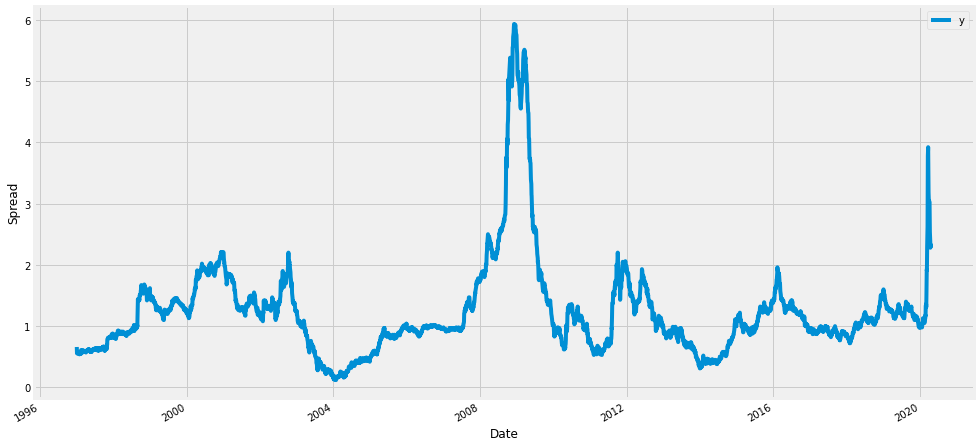

In [5]:
pd.plotting.register_matplotlib_converters()
ax = ts.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Spread')
ax.set_xlabel('Date')

plt.show()

In [6]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
Model = Prophet(interval_width=0.95)

In [7]:
# Fit the timeseries to Model
Model.fit(ts)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
# Use make_future_dataframe() with a monthly frequency and periods = 36 for 3 years
# need to double check the parameters before running
future_dates = Model.make_future_dataframe(periods=120, freq='D')
future_dates.tail()

,ds
5936,2020-08-14
5937,2020-08-15
5938,2020-08-16
5939,2020-08-17
5940,2020-08-18


In [10]:
future_dates.head()

,ds
0,1996-12-31
1,1997-01-02
2,1997-01-03
3,1997-01-06
4,1997-01-07


In [11]:
# Predict the values for future dates and take the head of forecast
forecast = Model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-12-31,0.517339,-0.081246,1.088319,0.517339,0.517339,-0.004719,-0.004719,-0.004719,-0.024234,-0.024234,-0.024234,0.019515,0.019515,0.019515,0.0,0.0,0.0,0.512620
1,1997-01-02,0.519332,-0.056654,1.039075,0.519332,0.519332,-0.012053,-0.012053,-0.012053,-0.025601,-0.025601,-0.025601,0.013548,0.013548,0.013548,0.0,0.0,0.0,0.507279
2,1997-01-03,0.520329,-0.094391,1.107095,0.520329,0.520329,-0.010915,-0.010915,-0.010915,-0.021384,-0.021384,-0.021384,0.010469,0.010469,0.010469,0.0,0.0,0.0,0.509414
3,1997-01-06,0.523319,-0.104978,1.070271,0.523319,0.523319,-0.024116,-0.024116,-0.024116,-0.025144,-0.025144,-0.025144,0.001028,0.001028,0.001028,0.0,0.0,0.0,0.499203
4,1997-01-07,0.524315,-0.118749,1.089968,0.524315,0.524315,-0.026360,-0.026360,-0.026360,-0.024234,-0.024234,-0.024234,-0.002126,-0.002126,-0.002126,0.0,0.0,0.0,0.497955


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5936,2020-08-14,1.239703,0.603729,1.839049
5937,2020-08-15,1.325068,0.669792,1.956664
5938,2020-08-16,1.328998,0.631964,1.993470
5939,2020-08-17,1.247696,0.533613,1.911353
5940,2020-08-18,1.251962,0.610909,1.906283


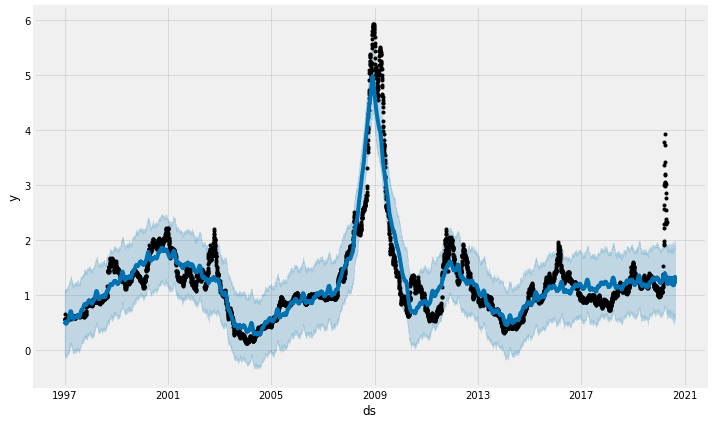

In [13]:
# Use Prophet's plot method to plot the predictions
Model.plot(forecast, uncertainty=True)
plt.show()

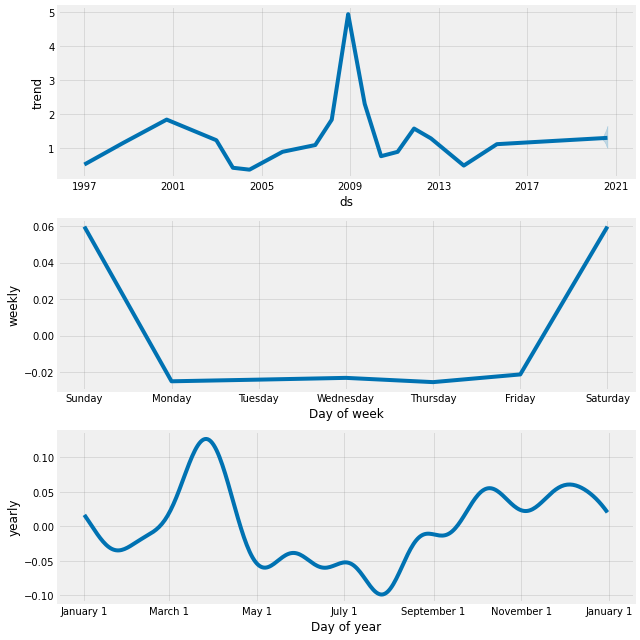

In [14]:
# Plot model components 
Model.plot_components(forecast)
plt.show()